In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [2]:
!pip install ucimlrepo


from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import sys
import os
import pandas as pd
import numpy as np



Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Caminho absoluto para a pasta src
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
src_path_2 = os.path.abspath(os.path.join(os.getcwd(), '..', 'src/modelos'))
sys.path.append(src_path)
sys.path.append(src_path_2)

from model_wizard import buscar_melhor_wisard
from model_mlp import busca_melhores_mlp
from tratamento_dados import preprocess_data,preprocess_data_standart_scale
from metricas import plot_confusion_matrix, classification_metrics
from smote import SmoteTransformer

## Segundo Dataset

In [5]:
# fetch dataset 
contraceptive_method_choice = fetch_ucirepo(id=30) 
  
# data (as pandas dataframes) 
X = contraceptive_method_choice.data.features 
y = contraceptive_method_choice.data.targets 
  
# metadata 
print(contraceptive_method_choice.metadata) 
  
# variable information 
print(contraceptive_method_choice.variables) 

print ("Targets:")
print(y)

{'uci_id': 30, 'name': 'Contraceptive Method Choice', 'repository_url': 'https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice', 'data_url': 'https://archive.ics.uci.edu/static/public/30/data.csv', 'abstract': 'Dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1473, 'num_features': 9, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Education Level', 'Other', 'Occupation'], 'target_col': ['contraceptive_method'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C59W2D', 'creators': ['Tjen-Sien Lim'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either

### Visualização de datasets

In [6]:
print("Features:")
print(X.head())
print("\nTargets:")
print(y)

# Identificar colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

print("\nColunas categóricas:", categorical_cols)
print("Colunas numéricas:", numeric_cols)

Features:
   wife_age  wife_edu  husband_edu  num_children  wife_religion  wife_working  \
0        24         2            3             3              1             1   
1        45         1            3            10              1             1   
2        43         2            3             7              1             1   
3        42         3            2             9              1             1   
4        36         3            3             8              1             1   

   husband_occupation  standard_of_living_index  media_exposure  
0                   2                         3               0  
1                   3                         4               0  
2                   3                         4               0  
3                   3                         3               0  
4                   3                         2               0  

Targets:
      contraceptive_method
0                        1
1                        1
2               

### Tratamento de Dados

In [7]:
# Inicializa o SMOTE transformer
smote_transformer = SmoteTransformer(random_state=42)

# Aplica SMOTE
X, y = smote_transformer.fit_transform(X, y)

# Mostra as dimensões após SMOTE
print("\nTamanho do conjunto após SMOTE:", X.shape)
print("Tamanho dos rótulos  após SMOTE:", y.shape)


Tamanho do conjunto após SMOTE: (1887, 9)
Tamanho dos rótulos  após SMOTE: (1887, 1)


In [8]:
# Pré-processamento
X_processed, y_encoded, le = preprocess_data(X, y, categorical_cols, numeric_cols)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Exibe dimensões
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Tamanho dos rótulos de treino:", y_train.shape)
print("Tamanho dos rótulos de teste:", y_test.shape)

print("\nExemplo de X_train (primeiras 5 linhas):")
print(X_train[:5])

print("\nExemplo de y_train (primeiros 5 rótulos):")
print(y_train[:5])

print("\nExemplo de X_test (primeiras 5 linhas):")
print(X_test[:5])

print("\nExemplo de y_test (primeiros 5 rótulos):")
print(y_test[:5])

Tamanho do conjunto de treino: (1320, 72)
Tamanho do conjunto de teste: (567, 72)
Tamanho dos rótulos de treino: (1320,)
Tamanho dos rótulos de teste: (567,)

Exemplo de X_train (primeiras 5 linhas):
[[1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
  1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0]]

Exemplo de y_train (primeiros 5 rótulos):
[2 2 1 0 2]

## Wizard

#### Métricas

In [9]:

best_model, best_params, best_score, random_search = buscar_melhor_wisard(X_train, y_train)

print("Melhores parâmetros encontrados:", best_params)
print("Acurácia média na CV:", best_score)

# Faz predição codificada
y_train_pred_encoded = random_search.predict(X_train)

# Imprime relatório de classificação com rótulos originais
classification_metrics(y_train, y_train_pred_encoded, le)

Melhores parâmetros encontrados: {'wisard__tuple_size': 9, 'wisard__bleaching': False}
Acurácia média na CV: 0.3477272727272727
              precision    recall  f1-score   support

           1       0.36      1.00      0.53       440
           2       0.77      0.12      0.21       440
           3       1.00      0.06      0.12       440

    accuracy                           0.39      1320
   macro avg       0.71      0.39      0.29      1320
weighted avg       0.71      0.39      0.29      1320



### Predição

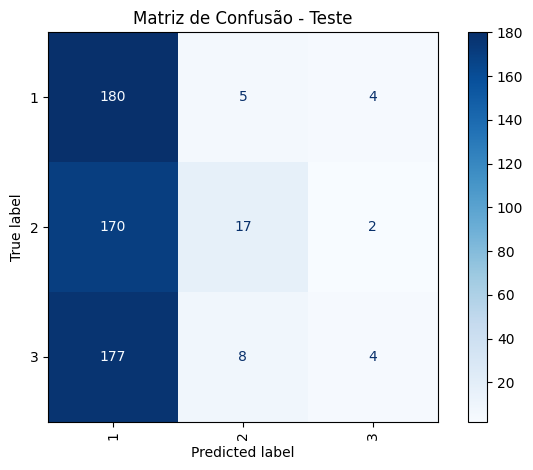

              precision    recall  f1-score   support

           1       0.34      0.95      0.50       189
           2       0.57      0.09      0.16       189
           3       0.40      0.02      0.04       189

    accuracy                           0.35       567
   macro avg       0.44      0.35      0.23       567
weighted avg       0.44      0.35      0.23       567



In [10]:
# Predição no teste
y_test_pred = random_search.predict(X_test)

plot_confusion_matrix(y_test, y_test_pred, le, maior = False, title="Matriz de Confusão - Teste")
classification_metrics(y_test, y_test_pred, le)

## MLP

In [12]:
# Inicializa o SMOTE transformer
smote_transformer = SmoteTransformer(random_state=42)

# Aplica SMOTE
X, y = smote_transformer.fit_transform(X, y)

# Mostra as dimensões após SMOTE
print("\nTamanho do conjunto após SMOTE:", X.shape)
print("Tamanho dos rótulos  após SMOTE:", y.shape)


Tamanho do conjunto após SMOTE: (1887, 9)
Tamanho dos rótulos  após SMOTE: (1887, 1)


### Tratamento de Dados

In [13]:
X_processed, y_encoded, le = preprocess_data_standart_scale(X, y, categorical_cols, numeric_cols)
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
# Exibe as dimensões dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Tamanho dos rótulos de treino:", y_train.shape)
print("Tamanho dos rótulos de teste:", y_test.shape)

print("\nExemplo de X_train (primeiras 5 linhas):")
print(X_train[:5])  # Exibe as 5 primeiras linhas de X_train

print("\nExemplo de y_train (primeiros 5 rótulos):")
print(y_train[:5])  # Exibe os 5 primeiros rótulos de y_train

print("\nExemplo de X_test (primeiras 5 linhas):")
print(X_test[:5])  # Exibe as 5 primeiras linhas de X_test

print("\nExemplo de y_test (primeiros 5 rótulos):")
print(y_test[:5])  # Exibe os 5 primeiros rótulos de y_test

Tamanho do conjunto de treino: (1320, 9)
Tamanho do conjunto de teste: (567, 9)
Tamanho dos rótulos de treino: (1320,)
Tamanho dos rótulos de teste: (567,)

Exemplo de X_train (primeiras 5 linhas):
      wife_age  wife_edu  husband_edu  num_children  wife_religion  \
1330  1.286258  0.989210     0.694827      0.756634      -2.140757   
991  -0.574117 -0.014899     0.694827     -0.124977       0.467124   
484  -0.202042 -0.014899    -0.561053     -0.565782       0.467124   
183   1.906383 -1.019009    -3.072813     -0.124977       0.467124   
881  -1.442291 -2.023119    -0.561053     -1.006587       0.467124   

      wife_working  husband_occupation  standard_of_living_index  \
1330      0.605311           -1.234340                  0.897318   
991       0.605311           -1.234340                  0.897318   
484      -1.652044            1.075229                 -0.165607   
183      -1.652044            2.230013                 -0.165607   
881       0.605311            1.075229   

### Métricas

In [14]:
random_search = busca_melhores_mlp(X_train, y_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Melhores parâmetros encontrados:", best_params)
print("Acurácia média na CV:", best_score)

# Faz predição codificada
y_train_pred_encoded = random_search.predict(X_train)

# Imprime relatório de classificação com rótulos originais
classification_metrics(y_train, y_train_pred_encoded, le)

Melhores parâmetros encontrados: {'mlp__activation_fn': <class 'torch.nn.modules.activation.ReLU'>, 'mlp__dropout_rate': np.float64(0.12180188587721688), 'mlp__early_stopping': True, 'mlp__hidden_sizes': (128, 64), 'mlp__learning_rate': np.float64(0.009504585843529142), 'mlp__max_epochs': 75, 'mlp__patience': 10, 'mlp__verbose': False, 'mlp__weight_decay': np.float64(0.009158643902204486)}
Acurácia média na CV: 0.5727272727272726
              precision    recall  f1-score   support

           1       0.73      0.60      0.66       440
           2       0.60      0.70      0.65       440
           3       0.57      0.59      0.58       440

    accuracy                           0.63      1320
   macro avg       0.64      0.63      0.63      1320
weighted avg       0.64      0.63      0.63      1320



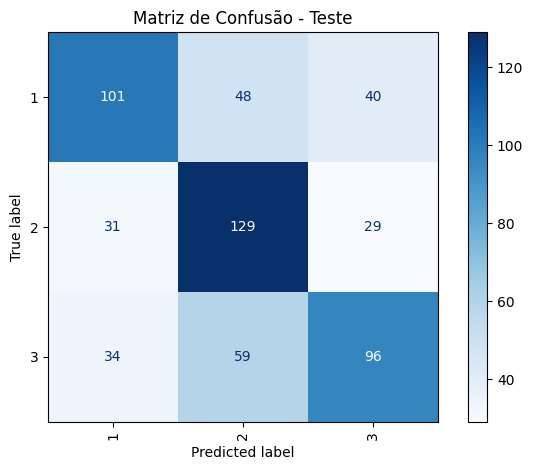

              precision    recall  f1-score   support

           1       0.61      0.53      0.57       189
           2       0.55      0.68      0.61       189
           3       0.58      0.51      0.54       189

    accuracy                           0.57       567
   macro avg       0.58      0.57      0.57       567
weighted avg       0.58      0.57      0.57       567



In [15]:
# Predição no teste
y_test_pred = random_search.predict(X_test)

plot_confusion_matrix(y_test, y_test_pred, le, maior = False, title="Matriz de Confusão - Teste")
classification_metrics(y_test, y_test_pred, le)